### Dataset Information 

This dataset is composed of a range of biomedical voice measurements from 42 people with early-stage Parkinson's disease recruited to a six-month trial of a telemonitoring device for remote symptom progression monitoring. The recordings were automatically captured in the patient's homes. 

Columns in the table contain subject number, subject age, subject gender, time interval from baseline recruitment date, motor UPDRS, total UPDRS, and 16 biomedical voice measures. Each row corresponds to one of 5,875 voice recording from these individuals. The main aim of the data is to predict the motor and total UPDRS scores ('motor_UPDRS' and 'total_UPDRS') from the 16 voice measures. 


### Attribute Information


1. subject# - Integer that uniquely identifies each subject 
2. age - Subject age 
3. sex - Subject gender '0' - male, '1' - female 
4. test_time - Time since recruitment into the trial. The integer part is the number of days since recruitment. 
5. motor_UPDRS - Clinician's motor UPDRS score, linearly interpolated 
6. total_UPDRS - Clinician's total UPDRS score, linearly interpolated 
7. Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP - Several measures of variation in fundamental frequency 
8. Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA - Several measures of variation in amplitude 
9. NHR,HNR - Two measures of ratio of noise to tonal components in the voice 
10. RPDE - A nonlinear dynamical complexity measure 
11. DFA - Signal fractal scaling exponent 
12. PPE - A nonlinear measure of fundamental frequency variation 



In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import train_test_split 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data")

In [3]:
dataset.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [4]:
y = dataset.iloc[:, 4:6]

In [5]:
X = dataset.drop(['motor_UPDRS', 'total_UPDRS'], axis=1)

In [8]:
X.head()

,subject#,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [8]:
y.head()

,motor_UPDRS,total_UPDRS
0,28.199,34.398
1,28.447,34.894
2,28.695,35.389
3,28.905,35.810
4,29.187,36.375


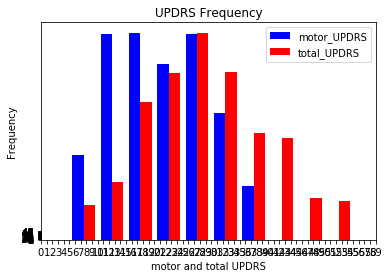

In [9]:
legend = ['motor_UPDRS', 'total_UPDRS']


motor_UPDRS = y['motor_UPDRS']
total_UPDRS = y['total_UPDRS']

plt.hist([motor_UPDRS, total_UPDRS], color=['blue', 'red'])
plt.xlabel("motor and total UPDRS")
plt.ylabel("Frequency")
plt.legend(legend)

plt.xticks(range(0, 60))
plt.yticks(range(1, 50))
plt.title('UPDRS Frequency')
plt.show()

In [10]:
from sklearn.cross_validation import train_test_split
import random

random_value = random.randint(1,1000)

X_train, X_test, motor_UPDRS_train, motor_UPDRS_test = train_test_split(X, motor_UPDRS, test_size = 0.25, random_state=random_value)

In [11]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [12]:
from sklearn import svm
#from sklearn.model_selection import GridSearchCV

regressor = svm.SVR(kernel='rbf', C=25, epsilon=0.5, gamma=0.4)
#parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}

#regressor = GridSearchCV(regressor, parameters)
regressor.fit(X_train, motor_UPDRS_train)


#regressor.best_params_

SVR(C=25, cache_size=200, coef0=0.0, degree=3, epsilon=0.5, gamma=0.4,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [13]:
motor_UPDRS_pred = regressor.predict(X_test)

In [14]:
regressor.score(X_test, motor_UPDRS_test)

0.8787354174950779

In [15]:
from sklearn.cross_validation import train_test_split

random_value = random.randint(1,1000)

X_train, X_test, total_UPDRS_train, total_UPDRS_test = train_test_split(X, total_UPDRS, test_size = 0.25, random_state=random_value)

In [16]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [17]:
from sklearn import svm
regressor = svm.SVR(kernel='rbf', gamma=0.4, C=25, epsilon = 0.9)
regressor.fit(X_train, total_UPDRS_train)

SVR(C=25, cache_size=200, coef0=0.0, degree=3, epsilon=0.9, gamma=0.4,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [18]:
total_UPDRS_pred = regressor.predict(X_test)

In [19]:
regressor.score(X_test, total_UPDRS_test)

0.8912083237819483